# Import necessary libraries


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [14]:
customers = pd.read_csv(r"C:\Users\kanak\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\kanak\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\kanak\Downloads\Transactions.csv")

# Overview of the datasets

In [17]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

# Check for missing values

In [20]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())


Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Check for duplicates

In [23]:
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())

Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


# 5 business insights from the EDA

# 1.Analyze customer distribution by region

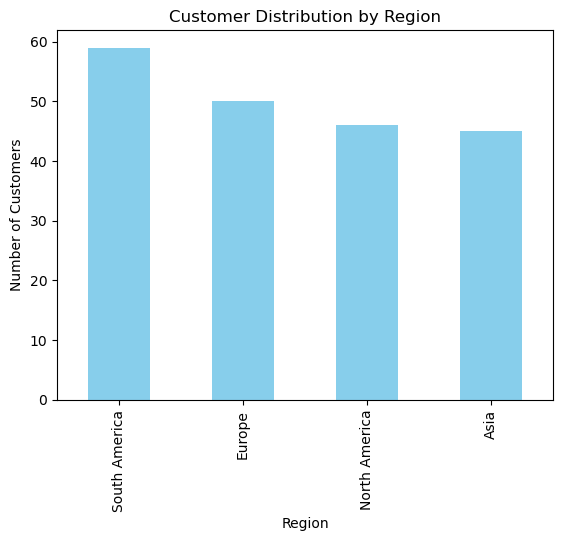

In [27]:
region_count = customers['Region'].value_counts()
region_count.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# 2.Top-selling product categories

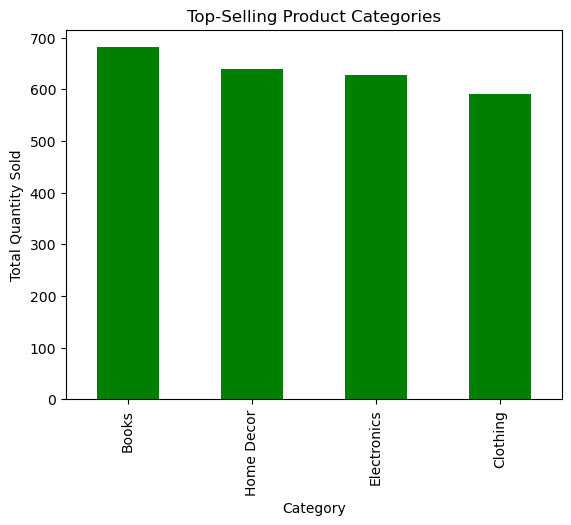

In [30]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products, on='ProductID')
top_categories = product_sales.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Top-Selling Product Categories', color='green')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

# 3.Monthly transaction trends

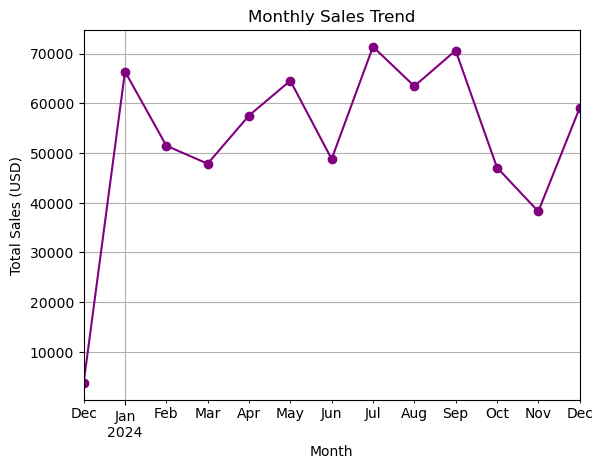

In [33]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

In [ ]:
# 4.Analyze high-value customers (top 10 by total purchase value)

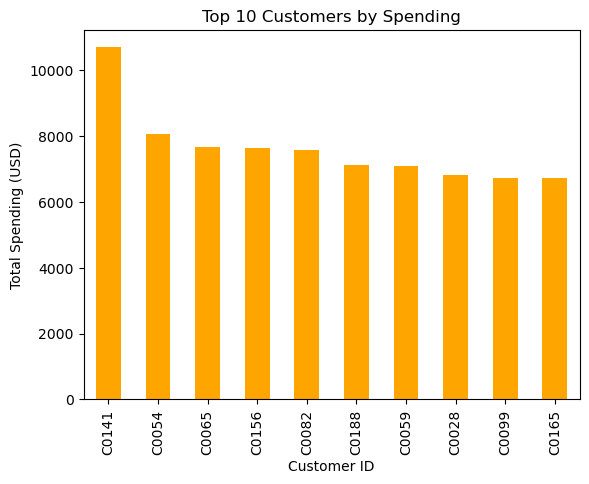

In [36]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
customer_spending.plot(kind='bar', title='Top 10 Customers by Spending', color='orange')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.show()

# Explore product pricing distribution

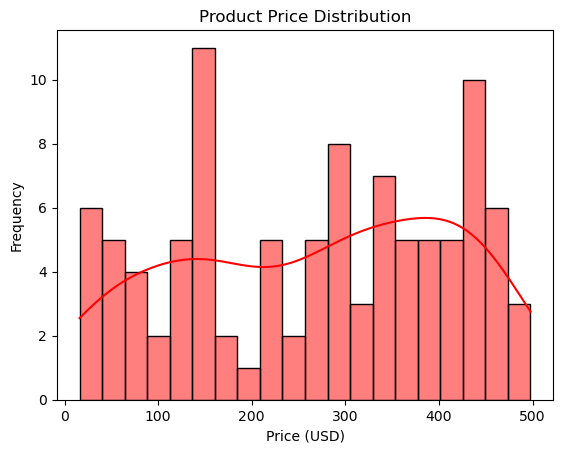

In [39]:
sns.histplot(products['Price'], bins=20, kde=True, color='red')
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()